In [1]:
import sqlite3
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
#import pylab as plt
import matplotlib.pyplot as plt
from collections import Counter
from numpy.random import choice

%matplotlib notebook


dbname = '../../data/sepsis.db'
conn = sqlite3.connect(dbname)

sql = 'SELECT * FROM "diagnoses"'

df = pd.read_sql(sql,conn)

In [2]:
df.head()


,Unnamed: 0,SubjectId,EncounterId,Source,StartDate,Code,Type
0,0,12804493,1,Patient History,2017-10-06 06:41:00,S95899A,ICD-10-CM
1,1,12804493,1,Billing,2017-10-08 07:30:52,I69162,ICD-10-CM
2,2,12804493,1,Billing,2017-10-05 22:41:02,Y36261S,ICD-10-CM
3,3,12804493,1,Encounter,2017-10-09 02:57:16,O2620,ICD-10-CM
4,4,12804493,1,Encounter,2017-10-06 01:01:59,S36592D,ICD-10-CM


In [3]:
from importlib import reload
from fakelite3 import KungFauxPandas

kfpd = KungFauxPandas()
fdf=kfpd.read_sql(sql,conn)
fdf.head()

Processing column Unnamed: 0 as a int64
Processing column SubjectId as a int64
Processing column EncounterId as a int64
Processing column Source as a object
Processing column StartDate as a object
Processing column Code as a object
Processing column Type as a object


,Unnamed: 0,SubjectId,EncounterId,Source,StartDate,Code,Type
0,4368,34827921,802,Encounter,2017-08-09 00:58:29,A393,ICD-10-CM
1,4126,37344357,152,Encounter,2017-11-25 05:44:17,A4151,ICD-10-CM
2,2175,23516306,1090,Problem List,2017-06-14 06:07:17,S20302A,ICD-10-CM
3,4665,50259404,873,Billing,2017-07-31 20:26:31,S63291S,ICD-10-CM
4,359,24468634,354,Billing,2017-12-18 18:02:45,M67972,ICD-10-CM


In [4]:
col = 'Code'
out_dict = dict()

colfact = df[col].factorize()
cc=Counter(colfact[0])
 
# convert from counts to proportions

for key in cc:
     cc[key] = cc[key] / len(df)

fakes = choice(elements,p=weights, replace=True, size=len(df))

out_dict[col] = [colfact[1][xx] for xx in fakes]


NameError: name 'elements' is not defined

In [5]:
len(cc.values()), len(df), len(cc)/len(df)

(4223, 5363, 0.7874324072347567)

In [12]:
col = 'Code'
out_dict = dict()

colfact = df[col].factorize()
cc=Counter(colfact[0])
 
# convert from counts to proportions

for key in cc:
     cc[key] = cc[key] / len(df)

fakes = choice(elements,p=weights, replace=True, size=len(df))

out_dict[col] = [colfact[1][xx] for xx in fakes]
#out_dict

NameError: name 'elements' is not defined

In [6]:
col = 'SubjectId'
kd = stats.gaussian_kde(df[col], bw_method='silverman')
out_dict[col]=np.int64(kd.resample()[0])


Processing column index as a int64
Processing column SubjectId as a object
Processing column EncounterId as a object
Processing column Source as a object
Processing column StartDate as a object
Processing column Code as a object
Processing column Type as a object
Processing column squishcode as a object
Processing column SepsisDiagnosisOrig as a object
Processing column SepsisDiagnosis as a object


,Code,EncounterId,SepsisDiagnosis,SepsisDiagnosisOrig,Source,StartDate,SubjectId,Type,index,squishcode
177286,E87.6,67207232,0,0,Billing Diagnosis,2017-12-28,4568009,ICD-10-CM,399379,H5010
365537,J96.90,63206716,0,0,Encounter Diagnosis,2017-12-20,4813029,ICD-10-CM,406065,D72829
150909,K21.9,62226055,0,0,Billing Diagnosis,2017-09-26,4683796,ICD-10-CM,158579,R748
406831,I67.9,64882467,0,0,Billing Diagnosis,2017-07-03,5426588,ICD-10-CM,40228,R7303
341292,I35.0,61972502,1,0,Billing Diagnosis,2017-08-18,4436239,ICD-10-CM,288711,K5900
333948,K72.90,64670042,0,0,Billing Diagnosis,2017-11-01,5383156,ICD-10-CM,109456,F1290
499648,Z86.79,66937718,0,0,Encounter Diagnosis,2017-06-20,118836,ICD-10-CM,495086,Z7901
385053,I08.1,67623216,0,0,Billing Diagnosis,2017-09-05,5314710,ICD-10-CM,81395,E876
394369,I12.9,62279846,0,0,Billing Diagnosis,2017-07-10,3041648,ICD-10-CM,33875,I472
82257,R41.82,65693597,0,0,Billing Diagnosis,2017-09-01,5471950,ICD-10-CM,96483,J449


In [11]:
df.head()

,index,SubjectId,EncounterId,Source,StartDate,Code,Type,squishcode,SepsisDiagnosisOrig,SepsisDiagnosis
0,0,2788,62270583,Billing Diagnosis,2017-06-09,E11.649,ICD-10-CM,E11649,0,0
1,1,2788,62270583,Billing Diagnosis,2017-06-09,D63.8,ICD-10-CM,D638,0,0
2,2,28346,63490105,Billing Diagnosis,2017-07-26,Z88.2,ICD-10-CM,Z882,0,0
3,3,34447,69545541,Encounter Diagnosis,2017-11-08,N39.0,ICD-10-CM,N390,0,0
4,4,34994,62944636,Billing Diagnosis,2017-06-25,M10.071,ICD-10-CM,M10071,0,0


In [12]:
pd.crosstab(df.Codeode, df.squishcode)

squishcode,07032,1101,138,1539,1623,1729,1749,193,1991,2113,...,Z9882,Z9884,Z9885,Z98890,Z98891,Z9911,Z992,Z993,Z9981,Z9989
Code,,,,,,,,,,,,,,,,,,,,,
070.32,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153.9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172.9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174.9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
199.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
np.corrcoef(df.Code, df.squishcode)

KeyboardInterrupt: 

In [9]:
sdf = df.sample(5000)
for thiscol in sdf.columns:
    if sdf[thiscol].dtype=='object':
        print('Converting column ', thiscol)
        sdf[thiscol] = sdf[thiscol].factorize()[0]
    
#np.cov(sdf)

Converting column  Source
Converting column  StartDate
Converting column  Code
Converting column  Type


/Users/seth/OneDrive - The University of Colorado Denver/Documents/ICML_2018_Paper/faker-prototype/sourcecode/python/kungfauxpandas/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seth/OneDrive - The University of Colorado Denver/Documents/ICML_2018_Paper/faker-prototype/sourcecode/python/kungfauxpandas/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


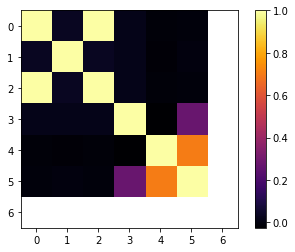

In [10]:
cc = np.corrcoef(sdf.transpose())
#cc = np.cov(sdf.transpose())
#cc[5,1]
plt.imshow(cc,cmap='inferno')
plt.colorbar()

In [109]:
#sdf.head()
#help(np.correlate)
df.iloc[3]

index                                    3
SubjectId                            34447
EncounterId                       69545541
Source                 Encounter Diagnosis
StartDate                       2017-11-08
Code                                 N39.0
Type                             ICD-10-CM
squishcode                            N390
SepsisDiagnosisOrig                      0
SepsisDiagnosis                          0
Name: 3, dtype: object

In [11]:
from statsmodels.nonparametric import kernel_density as kd

ModuleNotFoundError: No module named 'statsmodels'

In [379]:
woo = kd.KDEMultivariate(np.array(sdf.iloc[:,[2,4,9]]), var_type=3*'u')
#help(kd.KDEMultivariate)

In [349]:
np.array(data=sdf.sample(2000).iloc[:,[2,4,9]])

TypeError: Required argument 'object' (pos 1) not found

In [361]:
xx = range(40)
bb = list(itertools.product(xx,xx,xx))

In [123]:
np.array(sdf.iloc[2]).shape

(10,)

In [176]:
from scipy.optimize import fsolve
import statsmodels.api as sm
import numpy as np

# fit
kde = woo#sm.nonparametric.KDEMultivariate()  # ... you already did this

# sample
u = np.random.random()

# 1-d root-finding
def func(x):
    return kde.cdf([x]) - u
#sample_x = brentq(func, -99999999, 99999999)  # read brentq-docs about these constants
                                              # constants need to be sign-changing for the function


In [158]:
#u = np.random.random()
#u
#sample_x = brentq(func, -99999999, 99999999)

In [291]:
def func(x):
    return kde.cdf([x]) - u

x0=[92,4,5,3,6,7,8,9,10,11]


In [287]:
from scipy.optimize import minimize
darf = minimize(func,np.array(x0))
print(darf)

      fun: -0.9488937871588804
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 992.,    4.,    5.,    3.,    6.,    7.,    8.,    9.,   10.,   11.])


In [292]:
x0, func(x0)


([92, 4, 5, 3, 6, 7, 8, 9, 10, 11], -0.9488937871588804)

In [293]:
func([0,0,0,0,0,3,0,0,0,0])

-0.9488937871588804

In [216]:
bork = np.mgrid[0:10,0:10, 0:10]

In [303]:
xx = range(4)

import itertools
ins = list(itertools.product(xx,xx,xx,xx,xx,xx,xx,xx,xx,xx))

vals = [func(i) for i in ins[1004:2004]]
func(ins[1004:2004])

array([-0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94889379,
       -0.94889379, -0.94889379, -0.94889379, -0.94889379, -0.94

In [301]:
func(bork[32532])

-0.9488937871588804

In [304]:
u


0.9488937871588804

In [300]:
#kde.cdf(bork[9000:10000])
func(x0)

-0.9488937871588804

In [297]:
list(bork[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [298]:
x0

[92, 4, 5, 3, 6, 7, 8, 9, 10, 11]

In [380]:
import statsmodels.api as sm
nobs = 300
np.random.seed(1234)  # Seed random generator
c1 = np.random.normal(size=(nobs,1))
c2 = np.random.normal(2, 1, size=(nobs,1))
  
#Estimate a bivariate distribution and display the bandwidth found:
   
#dens_u = sm.nonparametric.KDEMultivariate(data=[c1,c2], var_type='cc', bw='normal_reference')
#dens_u.bw

woo = sm.nonparametric.KDEMultivariate(data=sdf.iloc[:,[2,4,9]], var_type=3*'u')



In [383]:
woo.cdf()

KeyboardInterrupt: 

In [363]:
len(sdf)

10000

In [386]:
len(set(sdf.iloc[:,9]))

2

In [387]:
np.corrcoef(sdf.iloc[:,[2,9]])

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])